# Confusion Matrix

In [1]:
# ガンのデータを読み込み
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

In [2]:
# トレーニングとテストに分ける
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [4]:
# 学習
from sklearn import linear_model

clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
# 結果確認
clf.score(X_test, y_test)

0.95614035087719296

In [6]:
# テストデータを確認
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [7]:
# ガンなのにガンじゃないと判断されたのがいくつか確認する
y_pred = clf.predict(X_test)

In [8]:
conf_mat = np.zeros( [2, 2] )

for true_label, est_label in zip(y_test, y_pred):
    conf_mat[true_label, est_label] += 1

In [9]:
print(conf_mat)

[[ 46.   1.]
 [  4.  63.]]


In [10]:
import pandas as pd
df = pd.DataFrame(conf_mat, 
                  columns=["pred 0", "pred 1"], 
                  index=["true 0", "true 1"])

In [11]:
# 4個もある（これがconfusion matrix)
print(df)

        pred 0  pred 1
true 0    46.0     1.0
true 1     4.0    63.0


In [12]:
# confusion matrixはAPIが用意されている
# テストラベルと、予測したラベルが用意されていれば一発で出せる
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_score(y_test, y_pred)

0.95614035087719296

In [13]:
cmat = confusion_matrix(y_test, y_pred)
cmat

array([[46,  1],
       [ 4, 63]])

In [14]:
TP = cmat[0,0] # true positive 真陽性 本当に陽性だった
TP

46

In [15]:
TN = cmat[1,1] # true negative 真陰性 本当に陰性だった
TN

63

In [16]:
# これはもう一度再検査すればいいからOK
FP = cmat[1,0] # false positive 偽陽性 本当は良性だけど間違えた
FP

4

In [17]:
# これが非常にまずい
FN = cmat[0,1] # false negative 偽陰性 本当は悪性なのに間違えた
FN

1

# 多クラス問題（１０クラス問題）

In [18]:
# １０個の文字認識
from sklearn.datasets import load_digits
data = load_digits()

X = data.data
y = data.target
img = data.images

In [19]:
X[0].shape, img[0].shape

((64,), (8, 8))

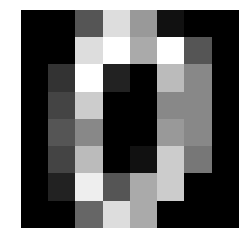

In [20]:
# 中を見てみる
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
plt.imshow(img[0], interpolation='none')
plt.axis('off');

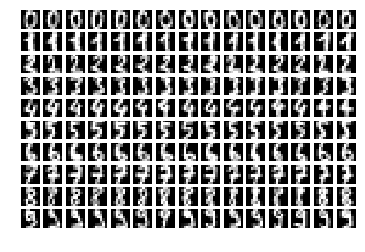

In [21]:
for i in range(10):
    i_th_digit = data.images[data.target == i]
    for j in range(0,15):
        plt.subplot(10, 15, i * 15 + j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j], interpolation='none')

In [22]:
# 学習用とテスト用に分ける
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                  train_size=0.8,
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [23]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
clf.score(X_test, y_test)

0.94999999999999996

In [25]:
# テストデータに対して予測ラベルを作成
y_pred = clf.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.94999999999999996

In [27]:
# confusion matrix （８が間違いやすい）
conf_mat = confusion_matrix(y_test, y_pred)

df = pd.DataFrame(conf_mat, 
                  columns=range(0,10), 
                  index=range(0,10))
print(df)

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  31   0   0   0   0   1   0   3   0
2   0   0  34   2   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  30   0   0   0   0   0
5   0   0   0   0   0  39   0   0   0   1
6   0   1   0   0   0   0  43   0   0   0
7   0   1   0   0   1   0   0  37   0   0
8   0   2   1   0   0   0   0   0  35   1
9   0   0   0   1   0   1   0   0   2  37


In [28]:
# PCAで白色化
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

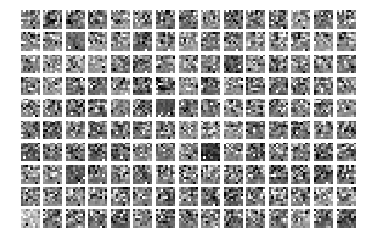

In [29]:
# PCAにすると人間には認識できなくなる
for i in range(10):
    i_th_digit = X_train_pca[y_train == i]
    for j in range(0,15):
        plt.subplot(10, 15, i * 15 + j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8,8), interpolation='none')

In [30]:
# でも結果は良い
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

0.9555555555555556

In [31]:
# confusion matrix
y_pred_pca = clf.predict(X_test_pca)
conf_mat = confusion_matrix(y_test, y_pred_pca)

df = pd.DataFrame(conf_mat, 
                  columns=range(0,10), 
                  index=range(0,10))
print(df)

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  32   0   0   0   0   1   0   2   0
2   0   0  35   1   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  29   0   0   1   0   0
5   0   1   0   0   0  38   0   0   0   1
6   0   1   0   0   0   0  43   0   0   0
7   0   0   0   0   0   0   0  39   0   0
8   0   3   1   0   0   0   0   0  35   0
9   0   0   0   0   0   1   0   2   1  37


In [32]:
# 今度はzcaの白色化
X_train_zca = X_train_pca.dot(pca.components_)
X_test_zca  = X_test_pca.dot(pca.components_)

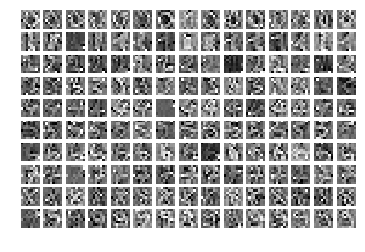

In [33]:
# pcaよりは見やすい
for i in range(10):
    i_th_digit = X_train_zca[y_train == i]
    for j in range(0,15):
        plt.subplot(10, 15, i * 15 + j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8,8), interpolation='none')

In [34]:
clf.fit(X_train_zca, y_train)
clf.score(X_test_zca, y_test)

0.9555555555555556

In [35]:
y_pred_zca = clf.predict(X_test_zca)
conf_mat = confusion_matrix(y_test, y_pred_zca)

df = pd.DataFrame(conf_mat, 
                  columns=range(0,10), 
                  index=range(0,10))
print(df)

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  32   0   0   0   0   1   0   2   0
2   0   0  35   1   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  29   0   0   1   0   0
5   0   1   0   0   0  38   0   0   0   1
6   0   1   0   0   0   0  43   0   0   0
7   0   0   0   0   0   0   0  39   0   0
8   0   3   1   0   0   0   0   0  35   0
9   0   0   0   0   0   1   0   2   1  37


In [36]:
# pcaで次元削減する
scores = []
for i in range(1,65):
    clf.fit(X_train_pca[:, 0:i], y_train)
    score = clf.score(X_test_pca[:, 0:i], y_test)
    print(i, score)
    scores.append(score)
scores = np.array(scores)

1 0.327777777778
2 0.536111111111
3 0.633333333333
4 0.758333333333
5 0.8
6 0.811111111111
7 0.866666666667
8 0.875
9 0.902777777778
10 0.911111111111
11 0.936111111111
12 0.938888888889
13 0.933333333333
14 0.936111111111
15 0.936111111111
16 0.941666666667
17 0.95
18 0.947222222222
19 0.95
20 0.95
21 0.95
22 0.952777777778
23 0.952777777778
24 0.95
25 0.944444444444
26 0.947222222222
27 0.947222222222
28 0.952777777778
29 0.955555555556
30 0.947222222222
31 0.95
32 0.95
33 0.952777777778
34 0.952777777778
35 0.95
36 0.95
37 0.952777777778
38 0.947222222222
39 0.955555555556
40 0.952777777778
41 0.958333333333
42 0.955555555556
43 0.958333333333
44 0.961111111111
45 0.958333333333
46 0.961111111111
47 0.958333333333
48 0.958333333333
49 0.955555555556
50 0.955555555556
51 0.961111111111
52 0.961111111111
53 0.961111111111
54 0.958333333333
55 0.958333333333
56 0.961111111111
57 0.958333333333
58 0.958333333333
59 0.961111111111
60 0.955555555556
61 0.955555555556
62 0.955555555556
63 

(0.9, 1)

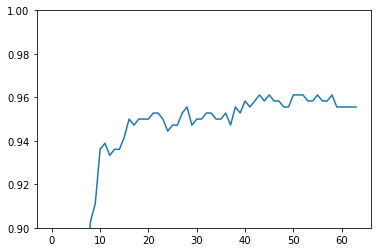

In [37]:
# 全部の次元を使えばいいというわけではない
plt.plot(scores)
plt.ylim(0.9, 1)